In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("hyundi.csv")

In [2]:
data.head()
# We need to narmalize mileage/mpg/engineSize

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [3]:
## check for the nulls

In [4]:
print(data.isnull().sum())


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64


In [5]:
data.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


<AxesSubplot:ylabel='price'>

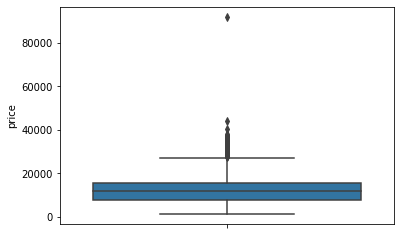

In [6]:
#sns.set_theme(style="whitegrid")
sns.boxplot(y=data["price"])

**what kind of plots suitable for visualising categorical variable with continuous variable?**

*visualize the year column (the categorical variable) with the price (the continuous variable)*

*visualize the model column (the categorical variable) with the price (the continuous variable)*

In [7]:
## your code here





In [8]:
## your code here





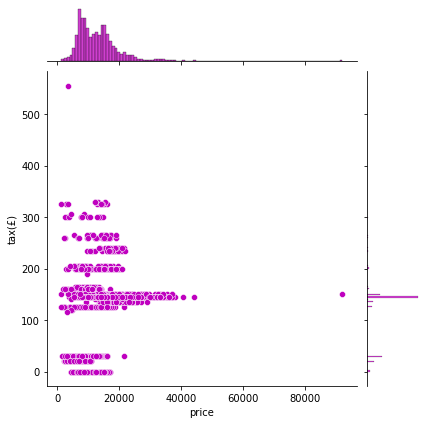

In [9]:
sns.jointplot(x="price", y="tax(£)", data=data,
                 
                  color="m")

**what can you interpret from this visualization?**

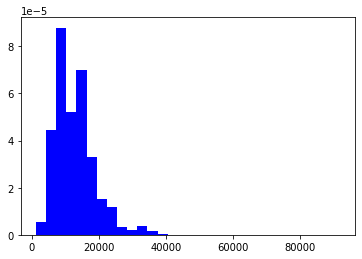

Skewness: 1.5885714727395455
Kurtosis: 7.968769386201491


In [10]:
plt.hist(data["price"].values, color = "blue", bins=30,density = True  )
plt.show()

# A positive skewness value in the output indicates an asymmetry in the distribution corresponding to row 3 and the tail is larger towards the right hand side of the distribution.
print("Skewness: " + str(data['price'].skew()))

#
print("Kurtosis: " + str(data['price'].kurt()))
## positive kurtosis means heavy tail and vice versa

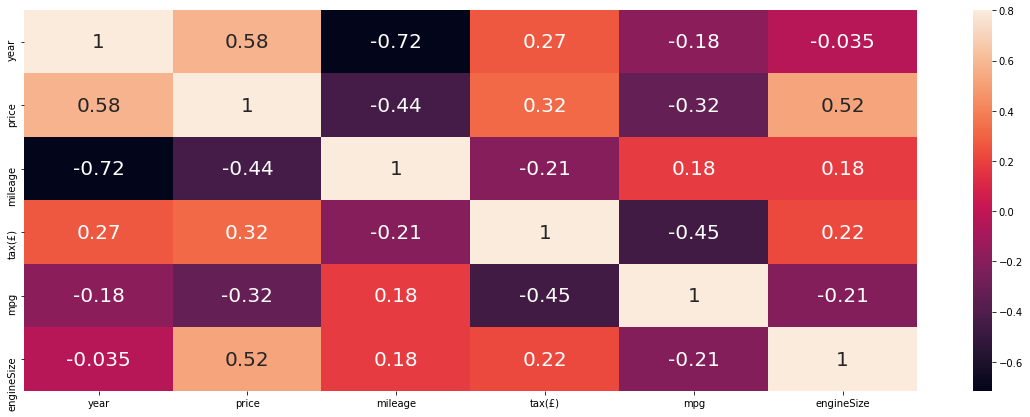

In [11]:
corr = data.corr()
f2, ax2 = plt.subplots(figsize=(20, 7))
sns.heatmap(corr, vmax=0.8,annot_kws={'size': 20}, annot=True)
plt.savefig('heatmap.png',bbox_inches='tight')


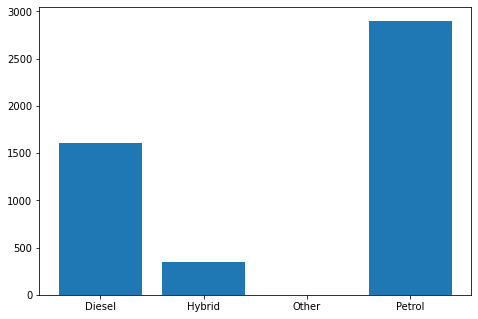

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fuel_type = ['Diesel','Hybrid','Other','Petrol']
fuel_type_c = list(data.groupby("fuelType").count()['year'].values)
ax.bar(fuel_type,fuel_type_c)
plt.show()

In [14]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [15]:
data_onehot = pd.get_dummies(data,columns=['model', 'transmission','fuelType'])

In [16]:
data_onehot

,year,price,mileage,tax(£),mpg,engineSize,model_ Accent,model_ Amica,model_ Getz,model_ I10,...,model_ Tucson,model_ Veloster,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,7999,17307,145,58.9,1.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2016,14499,25233,235,43.5,2.0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,2016,11399,37877,30,61.7,1.7,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,2016,6499,23789,20,60.1,1.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,2015,10199,33177,160,51.4,2.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,2016,8680,25906,0,78.4,1.6,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4856,2015,7830,59508,30,65.7,1.7,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4857,2017,6830,13810,20,60.1,1.0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4858,2018,13994,23313,145,44.8,1.6,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [17]:

from sklearn.model_selection import train_test_split
X = data_onehot.drop(['price'],axis=1)
y = data_onehot['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

# Visualization using PCA

Text(0, 0.5, 'Price')

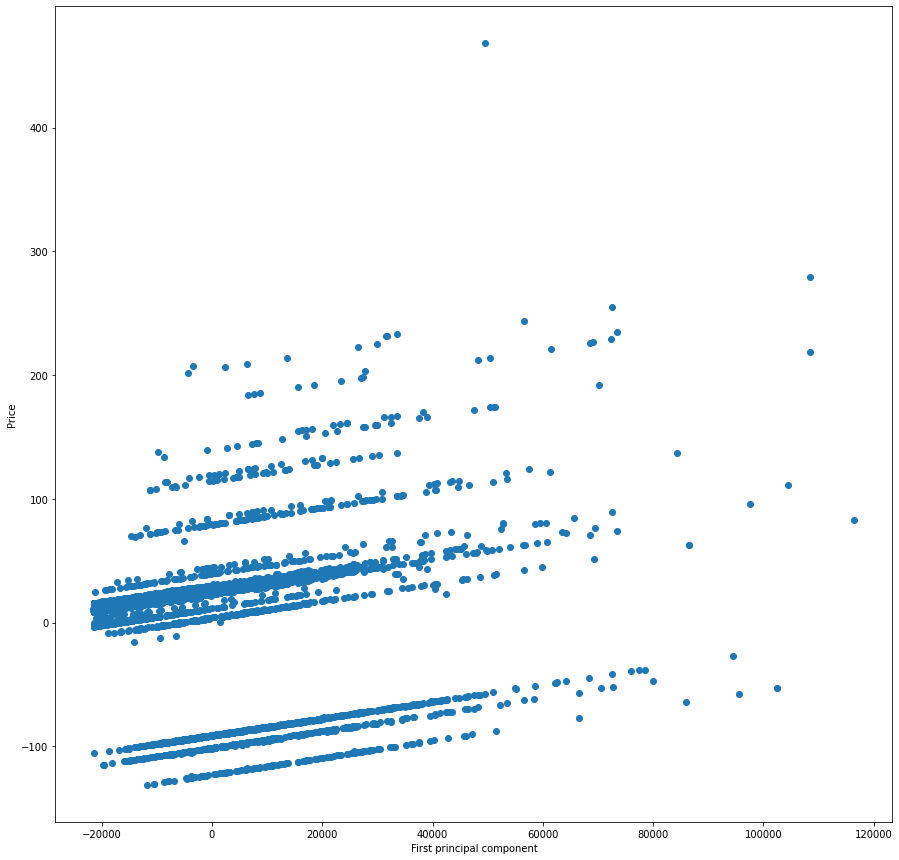

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.values)
x_pca = pca.transform(X.values)

plt.figure(figsize=(15,15))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Price')

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X,y)


0.8445445682151425

In [21]:
results = X_test.copy()
results["predicted"] = regressor.predict(X_test)
results["actual"]= y_test
results = results[['predicted', 'actual']]
results['predicted'] = results['predicted'].round(2)
y_pred = regressor.predict(X_test)
results

,predicted,actual
1147,10587.48,10350
1817,10203.59,9190
241,6938.71,7298
1678,9444.64,8798
4696,7064.81,6865
...,...,...
301,8796.88,7798
163,7006.59,7998
3909,12708.95,12562
1984,13496.78,14291


# Visualizing the Results

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0. In Scikit Learn it looks like:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 3794542.25
Coefficient of determination: 0.88


In [23]:
#Normalization

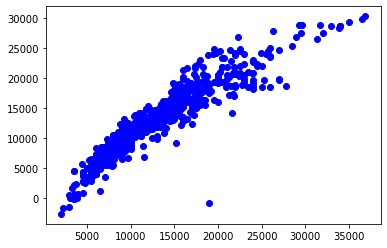

In [24]:
plt.scatter(y_test,y_pred , color='blue')


# Non Linear Regression

Decision Tree and Random Forest

In [25]:
#read x &y as numpy array for faster execution 


X = # your code is here 
y = # your code is here 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print(X_train.shape); print(X_test.shape)

(3888, 29)
(972, 29)


## **Use Decision Tree & Random Forest**

## **Compare the resulsts and visualize it as above**